In [2]:
import ee
import geemap

In [3]:
ee.Initialize()

In [6]:

s2 = ee.ImageCollection('COPERNICUS/S2_SR') \
  .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 0.25))

s2_arr = 
pt = ee.Geometry.Point([77, 13])

Map = geemap.Map()
Map.centerObject(pt, 16)
Map.addLayer(s2.mosaic(), {'bands' : ['B8','B4','B3'], 'min' : 0, 'max' : 3000}, 's2')
Map.addLayer(pt, {}, 'pt')
Map.addLayerControl()
Map


Map(center=[13, 77], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Tog…

In [18]:

px_around_pt = 10
imdim = (px_around_pt * 2) + 1
kernel_list = ee.List.repeat(1, imdim)
kernel_lists = ee.List.repeat(kernel_list, imdim)
kernel = ee.Kernel.fixed(imdim, imdim, kernel_lists, 
                         x = px_around_pt + 1, y = px_around_pt + 1)
# kernel.getInfo()
s2im = s2.mosaic().select(['B8','B4','B3'])
s2ar_ee = s2im.neighborhoodToArray(kernel)
s2ar = s2ar_ee.reduceRegion(ee.Reducer.first(), geometry = pt, scale = 10).getInfo()

In [40]:
import numpy as np
import matplotlib.pyplot as plt
B3 = np.expand_dims(np.array(s2ar['B3']), 2)
B4 = np.expand_dims(np.array(s2ar['B4']), 2)
B8 = np.expand_dims(np.array(s2ar['B8']), 2)

maxval = 3000
im_array = np.concatenate((B8, B4, B3), axis = 2)
im_array[im_array > maxval] = maxval


rgb_img_test = (255*((im_array - 0)/maxval)).astype('uint8')

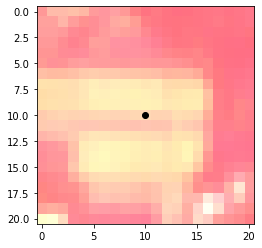

In [46]:
plt.imshow(rgb_img_test)
plt.plot(10, 10, marker = 'o', color = 'black')